<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Ovarian_Cancer_(OV)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	TCGA.OV.sampleMap_OV_clinicalMatrix
TCGA.OV.sampleMap_HiSeqV2_PANCAN.gz


In [ ]:
!pip install sparse_lmm

In [ ]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.OV.sampleMap_OV_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.OV.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [ ]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_OV_exp_HiSeq_exon,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2,_GENOMIC_ID_TCGA_OV_mutation_broad_gene,_GENOMIC_ID_TCGA_OV_PDMarrayCNV,_GENOMIC_ID_TCGA_OV_PDMRNAseqCNV,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_OV_mutation,_GENOMIC_ID_TCGA_OV_G4502A_07_3,_GENOMIC_ID_TCGA_OV_G4502A_07_2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628-11,TCGA-01-0628-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628-11A-01R-0363-07,NaN
TCGA-01-0629-11,TCGA-01-0629-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629-11A-01R-0363-07,NaN
TCGA-01-0630-11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630-11A-01R-0363-07
TCGA-01-0631-11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631-11A-01R-0363-07
TCGA-01-0633-11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633-11A-01R-0363-07


In [ ]:
# Display gene dataset
gene_data.head()

,TCGA-61-1910-01,TCGA-61-1728-01,TCGA-09-1666-01,TCGA-24-1469-01,TCGA-04-1348-01,TCGA-61-1917-01,TCGA-61-2009-01,TCGA-31-1950-01,TCGA-31-1951-01,TCGA-61-1995-01,...,TCGA-24-1560-01,TCGA-29-1783-01,TCGA-59-2348-01,TCGA-24-1424-01,TCGA-13-1507-01,TCGA-25-2404-01,TCGA-61-2095-01,TCGA-29-1702-01,TCGA-24-1417-01,TCGA-57-1585-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.262892,-0.543692,-1.668892,-1.281392,-1.144492,-1.773892,-1.218792,0.021308,0.249208,-1.112592,...,-3.735192,-0.230492,0.059708,-0.925092,-1.171692,-0.650692,0.385408,-1.699992,-1.256792,0.229008
HIF3A,-2.276126,1.810774,0.123074,4.097674,4.363674,5.661374,4.051874,3.148974,3.307474,0.231174,...,2.480974,5.403474,-2.767226,4.466974,-0.019226,1.622274,4.484274,5.387374,3.476574,3.444374
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.068935,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.290565,-0.531035,-0.531035,-0.531035
RNF10,0.657528,0.071628,-0.753772,-0.333972,0.358628,-0.616472,0.125528,0.343428,0.340628,0.379628,...,1.114828,-0.096872,0.765328,0.483628,-1.121872,0.275528,0.115528,-0.670972,0.012128,-0.139572
RNF11,-0.865078,-0.181678,0.343322,-0.507178,-0.729078,-0.145578,0.192422,-0.333178,-0.202478,0.047822,...,0.893722,0.551922,0.161622,-0.313878,0.401022,-0.180578,-0.228178,0.308122,0.070622,-0.144078


In [ ]:

# Set Basic info

trait = 'Ovarian Cancer'
condition = 'depression'
condition_col = 'BDNF'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 101 features, and the gene dataset includes 20530 genes


In [ ]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628-11,TCGA-01-0628-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0629-11,TCGA-01-0629-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0630-11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0631-11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0633-11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,BDNF,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1348-01,1.236342,-1.144492,4.363674,-0.531035,0.358628,-0.729078,0.64369,0.042406,1.447654,1.103801,...,-0.127978,-0.966217,0.660767,1.89921,0.277323,-0.963686,-1.161227,1.373005,-1.843933,-0.089112
TCGA-04-1357-01,1.522142,-0.681392,2.275374,-0.531035,-0.814372,-0.131978,0.10519,0.854706,0.423254,0.299901,...,-0.748878,-1.587117,1.654867,2.59361,1.034923,-1.449686,-1.648627,1.421205,-0.700533,-0.324312
TCGA-04-1362-01,0.025442,-0.298792,2.225074,-0.531035,0.300928,0.047622,-0.65201,-0.421194,2.968654,1.154701,...,-0.748878,-1.587117,-0.368833,2.07851,1.137323,-2.849686,-2.889527,0.163805,-2.797333,-0.784212
TCGA-04-1364-01,-0.656858,-1.884192,5.459374,-0.531035,-0.296072,-0.551278,-0.97961,1.181606,2.309254,1.007501,...,1.386022,-1.077217,-2.833033,2.88541,0.417723,-1.703186,0.590773,0.999505,-2.731333,-0.705912
TCGA-04-1365-01,-1.259458,-0.682892,1.917674,-0.531035,-0.014072,-0.229678,-0.95741,0.478706,0.611454,0.902401,...,-0.748878,-1.587117,1.026667,2.92631,1.055923,-2.831186,-0.571927,0.394805,-1.341533,-0.757312


In [ ]:

# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,BDNF,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ovarian Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1348-01,1.236342,-1.144492,4.363674,-0.531035,0.358628,-0.729078,0.64369,0.042406,1.447654,1.103801,...,-0.966217,0.660767,1.89921,0.277323,-0.963686,-1.161227,1.373005,-1.843933,-0.089112,1
TCGA-04-1357-01,1.522142,-0.681392,2.275374,-0.531035,-0.814372,-0.131978,0.10519,0.854706,0.423254,0.299901,...,-1.587117,1.654867,2.59361,1.034923,-1.449686,-1.648627,1.421205,-0.700533,-0.324312,1
TCGA-04-1362-01,0.025442,-0.298792,2.225074,-0.531035,0.300928,0.047622,-0.65201,-0.421194,2.968654,1.154701,...,-1.587117,-0.368833,2.07851,1.137323,-2.849686,-2.889527,0.163805,-2.797333,-0.784212,1
TCGA-04-1364-01,-0.656858,-1.884192,5.459374,-0.531035,-0.296072,-0.551278,-0.97961,1.181606,2.309254,1.007501,...,-1.077217,-2.833033,2.88541,0.417723,-1.703186,0.590773,0.999505,-2.731333,-0.705912,1
TCGA-04-1365-01,-1.259458,-0.682892,1.917674,-0.531035,-0.014072,-0.229678,-0.95741,0.478706,0.611454,0.902401,...,-1.587117,1.026667,2.92631,1.055923,-2.831186,-0.571927,0.394805,-1.341533,-0.757312,1


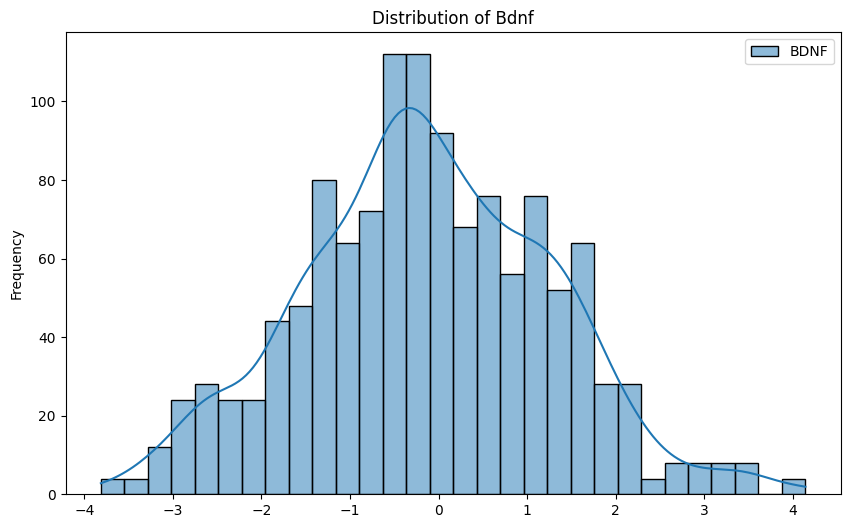

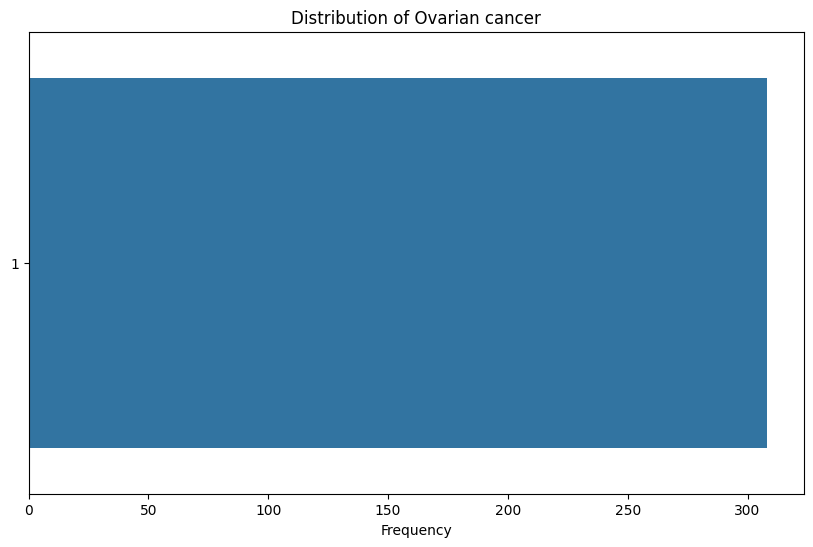

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'BDNF' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [ ]:

merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ovarian Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1348-01,0,-1.144492,4.363674,-0.531035,0.358628,-0.729078,0.64369,0.042406,1.447654,1.103801,...,-0.966217,0.660767,1.89921,0.277323,-0.963686,-1.161227,1.373005,-1.843933,-0.089112,1
TCGA-04-1357-01,0,-0.681392,2.275374,-0.531035,-0.814372,-0.131978,0.10519,0.854706,0.423254,0.299901,...,-1.587117,1.654867,2.59361,1.034923,-1.449686,-1.648627,1.421205,-0.700533,-0.324312,1
TCGA-04-1362-01,0,-0.298792,2.225074,-0.531035,0.300928,0.047622,-0.65201,-0.421194,2.968654,1.154701,...,-1.587117,-0.368833,2.07851,1.137323,-2.849686,-2.889527,0.163805,-2.797333,-0.784212,1
TCGA-04-1364-01,0,-1.884192,5.459374,-0.531035,-0.296072,-0.551278,-0.97961,1.181606,2.309254,1.007501,...,-1.077217,-2.833033,2.88541,0.417723,-1.703186,0.590773,0.999505,-2.731333,-0.705912,1
TCGA-04-1365-01,0,-0.682892,1.917674,-0.531035,-0.014072,-0.229678,-0.95741,0.478706,0.611454,0.902401,...,-1.587117,1.026667,2.92631,1.055923,-2.831186,-0.571927,0.394805,-1.341533,-0.757312,1


In [ ]:

import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [ ]:

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-18-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-18-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-18-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 84.92% ± 5.23%


In [ ]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-18-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [ ]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-18-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [ ]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: depression
Coefficient: 0.0000
p-value: 1



In [ ]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

流式输出内容被截断，只能显示最后 5000 行内容。
           RDH5 -5.176900e-31       9.991696e-48
       KIAA1239  2.218671e-31       9.995816e-48
          TGFBI  1.491440e-30       9.995816e-48
          OR1D2  1.156714e-30       1.000519e-47
         HDAC11  3.697785e-31       1.000635e-47
         NEDD4L  2.958228e-31       1.000666e-47
          GSTM5 -4.437343e-31       1.000666e-47
          LCE6A -7.401734e-30       1.001428e-47
          HIP1R  1.380507e-30       1.001683e-47
        SDR39U1 -4.905729e-30       1.002032e-47
         CCDC36  6.902533e-31       1.002161e-47
        FAM101B  8.566536e-31       1.002161e-47
         OR51B2 -2.218671e-30       1.002195e-47
          WWTR1 -1.355855e-30       1.002873e-47
            CFI  4.437343e-31       1.002978e-47
          CDHR3 -1.109336e-30       1.003795e-47
          TTC7B  5.669938e-31       1.005234e-47
      C14orf184 -8.381647e-31       1.007665e-47
          CDK10  6.501939e-31       1.007773e-47
           ARF6  1.055101e-29       1.0081